In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
data = pd.read_csv(file_url)

In [4]:
data.head() # 상위 5행 출력

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.info() # 변수 특징 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [6]:
data.info(show_counts=True) # Non-Null Count 보이도록 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [7]:
round(data.describe(), 2) # 통계 정보 확인

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


In [8]:
data.drop(['first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time', 'job', 'merchant'], axis=1, inplace=True)

In [9]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']) # 날짜 형식으로 변환

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


In [11]:
amt_info = data.groupby('cc_num').agg(['mean', 'std'])['amt'].reset_index()

In [12]:
amt_info.head()

,cc_num,mean,std
0,60416207185,59.257796,142.869746
1,60422928733,65.483159,92.042844
2,60423098130,96.376084,1000.693872
3,60427851591,107.487550,131.014534
4,60487002085,64.096925,153.207660


In [13]:
data = data.merge(amt_info, on='cc_num', how='left') # 데이터 합치기

In [14]:
data['amt_z_score'] = (data['amt'] - data['mean']) / data['std'] # z-score 계산

In [15]:
data[['amt', 'mean', 'std', 'amt_z_score']].head() # 상위 5행 확인

,amt,mean,std,amt_z_score
0,4.97,89.408743,127.530101,-0.662108
1,107.23,56.078113,159.201852,0.321302
2,220.11,69.924272,116.688602,1.287064
3,45.00,80.090040,280.077880,-0.125287
4,41.96,95.341146,94.322842,-0.565941


In [16]:
data.drop(['mean', 'std'], axis=1, inplace=True) # 변수 제거

In [17]:
category_info = data.groupby(['cc_num', 'category']).agg(['mean', 'std'])['amt'].reset_index() # cc_num과 category 기준으로 amt의 평균과 표준편차를 계산

In [18]:
data = data.merge(category_info, on = ['cc_num', 'category'], how='left')

In [19]:
data['cat_z_score'] = (data['amt'] - data['mean']) / data['std'] # z-score 계산
data.drop(['mean', 'std'], axis=1, inplace=True)

In [20]:
import geopy.distance

In [21]:
# 위도, 경수 한 변수로 합치기
data['merch_coord'] = pd.Series(zip(data['merch_lat'], data['merch_long']))
data['cust_coord'] = pd.Series(zip(data['lat'], data['long']))

In [22]:
data['distance'] = data.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1) # 거리 계산

In [23]:
distance_info = data.groupby('cc_num').agg(['mean', 'std'])['distance'].reset_index() # cc_num 별, 거리 정보 계산
data = data.merge(distance_info, on = 'cc_num', how='left') # 데이터 합치기
data['distance_z_score'] = (data['distance'] - data['mean']) / data['std'] # z-score 계산
data.drop(['mean', 'std'], axis=1, inplace=True)
data.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0,-0.662108,-0.688297,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.773821,0.030974
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.321302,0.317631,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.216618,-1.475224
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0,1.287064,2.872509,"(43.150704, -112.154481)","(42.1808, -112.262)",108.102912,1.160572
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0,-0.125287,-1.050197,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.685115,0.818063
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0,-0.565941,1.312866,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.702395,0.064037


In [24]:
data['age'] = 2023 - pd.to_datetime(data['dob']).dt.year # 나이 계산

In [25]:
data.drop(['cc_num', 'lat', 'long', 'merch_lat', 'merch_long', 'dob', 'merch_coord', 'cust_coord'], axis=1, inplace=True) # 변수 제거
data.head() # 상위 5행 출력

,trans_date_trans_time,category,amt,gender,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,0,-0.662108,-0.688297,78.773821,0.030974,35
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,0,0.321302,0.317631,30.216618,-1.475224,45
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,0,1.287064,2.872509,108.102912,1.160572,61
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,0,-0.125287,-1.050197,95.685115,0.818063,56
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,0,-0.565941,1.312866,77.702395,0.064037,37


In [26]:
# 더미 변수 변환
data = pd.get_dummies(data, columns = ['category', 'gender'], drop_first = True)

In [27]:
data.set_index('trans_date_trans_time', inplace=True)
data.head()

,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,4.97,3495,0,-0.662108,-0.688297,78.773821,0.030974,35,0,0,...,0,0,0,1,0,0,0,0,0,0
2019-01-01 00:00:44,107.23,149,0,0.321302,0.317631,30.216618,-1.475224,45,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-01 00:00:51,220.11,4154,0,1.287064,2.872509,108.102912,1.160572,61,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01 00:01:16,45.00,1939,0,-0.125287,-1.050197,95.685115,0.818063,56,0,1,...,0,0,0,0,0,0,0,0,0,1
2019-01-01 00:03:06,41.96,99,0,-0.565941,1.312866,77.702395,0.064037,37,0,0,...,0,0,0,0,1,0,0,0,0,1


In [28]:
train = data[data.index < '2020-07-01'] # 훈련셋 설정
test = data[data.index >= '2020-07-01'] # 시험셋 설정

In [29]:
len(test) / len(data) # 시험셋 비율 확인

0.2837738623640543

In [30]:
X_train = train.drop('is_fraud', axis=1)
X_test = test.drop('is_fraud', axis=1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [31]:
import lightgbm as lgb

In [32]:
model_1 = lgb.LGBMClassifier(random_state = 100)
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [34]:
accuracy_score(y_test, pred_1)

0.9964749144410561

In [35]:
print(confusion_matrix(y_test, pred_1)) # 혼동 행렬 확인

[[522626   1023]
 [   830   1182]]


In [36]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.54      0.59      0.56      2012

    accuracy                           1.00    525661
   macro avg       0.77      0.79      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [37]:
proba_1 = model_1.predict_proba(X_test)

In [38]:
proba_1

array([[9.99944636e-01, 5.53639581e-05],
       [9.99912715e-01, 8.72847343e-05],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99890545e-01, 1.09455330e-04],
       [9.99624117e-01, 3.75882664e-04],
       [9.99868882e-01, 1.31118203e-04]])

In [39]:
proba_1[:, 1]

array([5.53639581e-05, 8.72847343e-05, 0.00000000e+00, ...,
       1.09455330e-04, 3.75882664e-04, 1.31118203e-04])

In [40]:
proba_1 = proba_1[:, 1]

In [41]:
proba_int1 = (proba_1 > 0.2).astype('int') # 0.2 기준으로 분류
proba_int2 = (proba_1 > 0.8).astype('int') # 0.8 기준으로 분류

In [42]:
print(confusion_matrix(y_test, proba_int1))

[[522007   1642]
 [   657   1355]]


In [43]:
print(classification_report(y_test, proba_int1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.45      0.67      0.54      2012

    accuracy                           1.00    525661
   macro avg       0.73      0.84      0.77    525661
weighted avg       1.00      1.00      1.00    525661



In [44]:
print(confusion_matrix(y_test, proba_int2))

[[522910    739]
 [  1007   1005]]


In [45]:
print(classification_report(y_test, proba_int2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.58      0.50      0.54      2012

    accuracy                           1.00    525661
   macro avg       0.79      0.75      0.77    525661
weighted avg       1.00      1.00      1.00    525661



In [46]:
roc_auc_score(y_test, proba_1)

0.9031275287192038

In [47]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'lambda_l1': [0, 10, 20, 30, 50],
    'lambda_l2': [0, 10, 20, 30, 50],
    'max_depth': [5, 10, 15, 20],
    'sumsample': [0.6, 0.8, 1]
}

In [48]:
model_2 = lgb.LGBMClassifier(random_state = 100)
rs = RandomizedSearchCV(model_2, param_distributions=params, n_iter=30, scoring='roc_auc', random_state=100, n_jobs=-1)

In [49]:
import time

start = time.time()
rs.fit(X_train, y_train)
print(time.time() - start)

6329.2022886276245


In [50]:
# 최적 하이퍼파라미터 확인
rs.best_params_

{'sumsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0}

In [51]:
rs_proba = rs.predict_proba(X_test)
roc_auc_score(y_test, rs_proba[:, 1])

0.9952625671240247

In [52]:
rs_proba_int = (rs_proba[:, 1] > 0.2).astype('int')
print(confusion_matrix(y_test, rs_proba_int))

[[522514   1135]
 [   508   1504]]


In [53]:
print(classification_report(y_test, rs_proba_int))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.57      0.75      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.78      0.87      0.82    525661
weighted avg       1.00      1.00      1.00    525661



In [54]:
train = data[data.index < '2020-01-01']
val = data[(data.index >= '2020-01-01') & (data.index < '2020-07-01')]
test = data[data.index >= '2020-07-01']

In [55]:
X_train = train.drop('is_fraud', axis = 1)
X_val = val.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_val = val['is_fraud']
y_test = test['is_fraud']

In [56]:
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

In [57]:
# 최적 파라미티 설정
params_set = rs.best_params_
# 평가 기준 추가
params_set['metrics'] = 'auc'

In [58]:
# 하이퍼 파라미터 확인
params_set

{'sumsample': 1,
 'n_estimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0,
 'metrics': 'auc'}

In [59]:
model_3 = lgb.train(params_set, d_train, valid_sets=[d_val], early_stopping_rounds=100, verbose_eval=100)

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.97237
[200]	valid_0's auc: 0.988574
[300]	valid_0's auc: 0.993031
[400]	valid_0's auc: 0.992582
Early stopping, best iteration is:
[327]	valid_0's auc: 0.993459


In [60]:
pred_3 = model_3.predict(X_test)

In [61]:
roc_auc_score(y_test, pred_3)

0.991352108964131

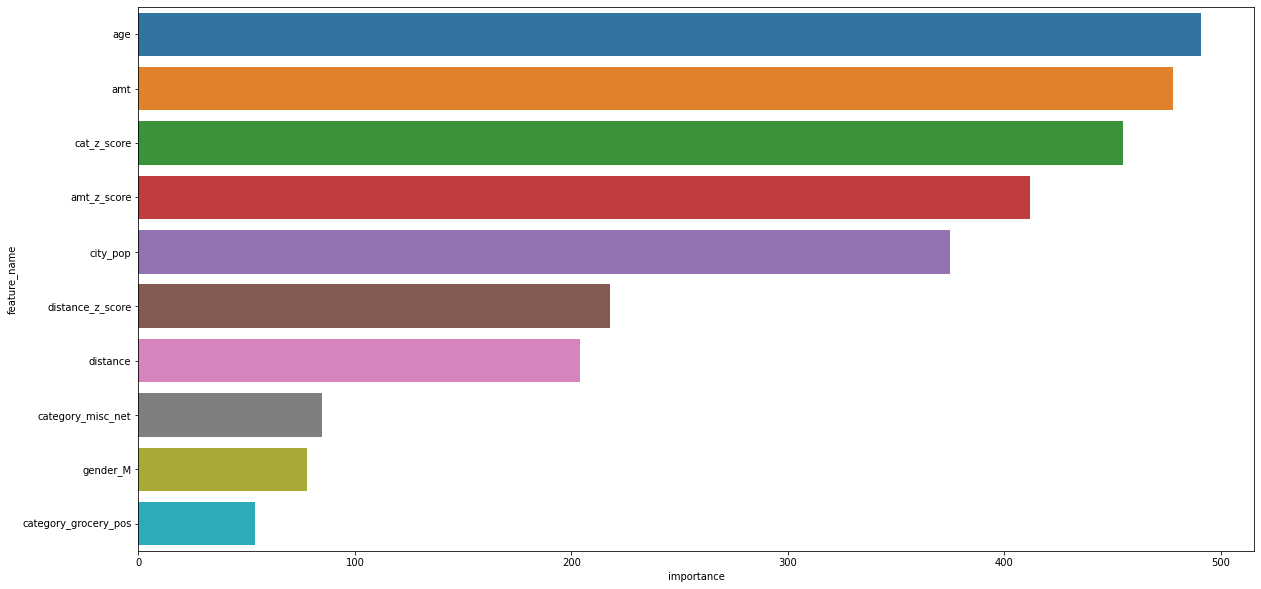

In [62]:
feature_imp = pd.DataFrame({'feature_name': X_train.columns, 'importance': model_1.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature_name", data=feature_imp.head(10))
plt.show()

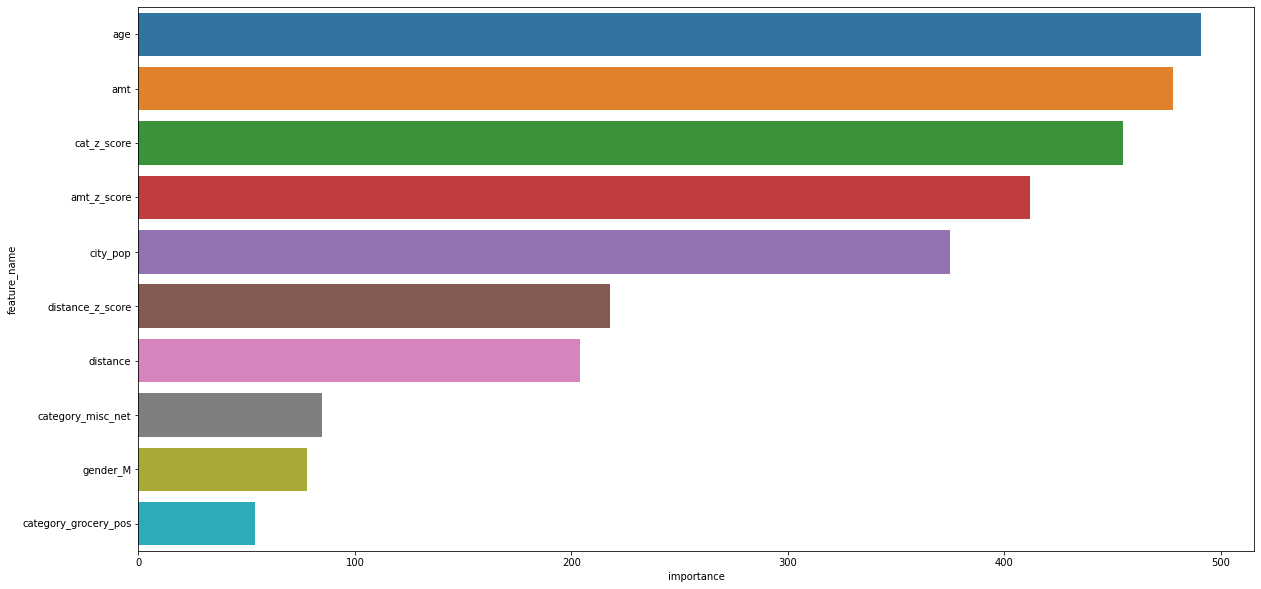

In [63]:
feature_imp_3 = pd.DataFrame(sorted(zip(model_3.feature_importance(), X_train.columns)), columns=['Value', 'Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature_name", data=feature_imp.head(10))
plt.show()